<div class="jumbotron" >
  <a id='inicio'><h1 class="display-4">Ing. Alejandro Vargas</h1></a>
  <p class="lead">PROCESO DE SELECCIÓN DATA SCIENTIST | SEMPLI</p>
  <hr class="my-4">
  <p>En este notebook se presenta el soporte con el cuál se responden a las tres preguntas planteadas en la prueba técnica.<br><br>Para navegar en el libro de forma rápida a las dos etapas de análisis, por favor use los siguientes enlaces:</p><br>
  <a class="btn btn-primary btn-lg" href="#Cls" role="button" style="color:white;" >Clasificación</a>
 <a class="btn btn-primary btn-lg" href="#Rs" role="button" style="color:white;" >Regresión</a>
</div>

<div class="alert alert-info" role="alert">
    <center><h2>Diagrama del proceso desarrollado</h2></center>
</div>

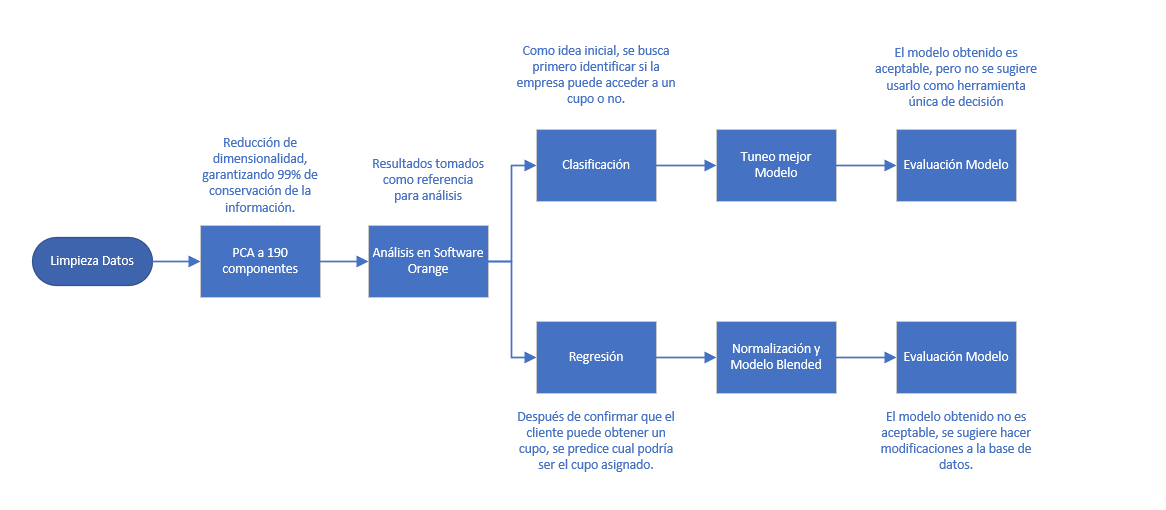

<div class="list-group" id="list-tab" role="tablist">
  <a id='menu'><h3  id='menu' class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Contenido del Notebook</h3></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#librerias" role="tab" aria-controls="profile">Importe Librerias<span class="badge badge-primary badge-pill">1</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#datos" role="tab" aria-controls="messages">Carga de datos<span class="badge badge-primary badge-pill">2</span></a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#visual" role="tab" aria-controls="settings">Preparación de datos<span class="badge badge-primary badge-pill">3</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#clean" role="tab" aria-controls="settings">Preprocesamiento<span class="badge badge-primary badge-pill">4</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#explo" role="tab" aria-controls="settings">Exploración de modelos<span class="badge badge-primary badge-pill">5</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#Tuneo" role="tab" aria-controls="settings"> Tuneo Modelo Clasificación<span class="badge badge-primary badge-pill">6</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#Reg" role="tab" aria-controls="settings"> Análisis modelo Regresión<span class="badge badge-primary badge-pill">7</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#modelReg" role="tab" aria-controls="settings">Creación Modelos de Regresión<span class="badge badge-primary badge-pill">8</span></a> 
        <a class="list-group-item list-group-item-action" data-toggle="list" href="#pred" role="tab" aria-controls="settings">Predicciones<span class="badge badge-primary badge-pill">9</span></a> 
           

<a id='librerias' class="btn btn-primary btn-lg btn-block active" role="button" aria-pressed="true" style="color:white">Importe Librerias</a>

In [1]:
#Esenciales
import warnings
warnings.filterwarnings(action="ignore")
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from scipy.stats import skew, norm

#Procesamiento
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

#Modelos
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor

<a id='datos' class="btn btn-primary btn-lg btn-block active" role="button" aria-pressed="true" style="color:white">Carga de Datos</a>

In [2]:
df = pd.read_excel('prueba_tecnica.xlsx', index_col=0)
df.tail()

,año_corte,mes_corte,pyg_corte,pyg_cierre,bg_corte,cupo_calculado
id,,,,,,
715,2022,3,"{'utilidad neta': 103079304.24, 'gastos operac...",NaN,{'pasivo': {'pasivo corriente': {'total': 2724...,262897350.0
716,2022,3,"{'utilidad neta': 337285980.8, 'gastos operaci...",NaN,{'pasivo': {'pasivo corriente': {'total': 6541...,202371590.0
717,2022,3,"{'utilidad neta': 48867827.6, 'gastos operacio...",NaN,{'pasivo': {'pasivo corriente': {'total': 8049...,23906034.0
718,2022,3,"{'utilidad neta': 61801323.33, 'gastos operaci...",NaN,{'pasivo': {'pasivo corriente': {'total': 2191...,40161871.0
719,2022,3,"{'utilidad neta': 574205252.17, 'gastos operac...",NaN,{'pasivo': {'pasivo corriente': {'total': 3794...,344523150.0


<a id='visual' class="btn btn-primary btn-lg btn-block active" role="button" aria-pressed="true" style="color:white">Preparación de Datos</a>

In [3]:
df = df.fillna("0")

In [4]:
pyg_corte = pd.json_normalize(df['pyg_corte'].apply(ast.literal_eval))
# pyg_corte.head()

In [5]:
pyg_cierre = pd.json_normalize(df['pyg_cierre'].apply(ast.literal_eval))
# pyg_cierre.head()

In [6]:
bg_corte = pd.json_normalize(df['bg_corte'].apply(ast.literal_eval))
# bg_corte.head()

In [7]:
df.drop(['pyg_corte', 'pyg_cierre', 'bg_corte', 'año_corte', 'mes_corte'], axis=1, inplace=True)
cupo = df

In [8]:
# Fue necesario crear dos copias para el análisis
cupo_calculado = copy.deepcopy(cupo)
y_cupo = copy.deepcopy(cupo) 

<div class="alert alert-info" role="alert">
    <center><h2>Dataframe Unificado</h2></center>
</div>

In [9]:
X = pd.concat([pyg_corte, pyg_cierre, bg_corte], axis=1) 

In [10]:
X.head()

,utilidad neta,utilidad antes de impuestos,utilidad operacional,utilidad bruta,gastos operacionales.total,gastos operacionales.gastos administrativos,gastos operacionales.provisiÃ³n y castigo de cartera,gastos operacionales.gastos de venta,gastos operacionales.costos operativos,costo de ventas.costo servicios,...,activo.activo corriente.castigo de cartera.otras cuentas por cobrar,activo.activo corriente.castigo de cartera.no comerciales,activo.activo corriente.castigo de cartera.total,activo.activo corriente.castigo de cartera.deterioro de cartera,activo.activo corriente.cuentas por cobrar y deterioro de cartera.derechos,activo.activo corriente.cuentas por cobrar y deterioro de cartera.activos por impuestos,"activo.activo no corriente.propiedad, planta y equipos.depreciaciÃ³n equipos cÃ³mputo","activo.activo no corriente.propiedad, planta y equipos.equipos cÃ³mputo",activo.activo corriente.efectivo y equivalentes al efectivo2408,pasivo.pasivo corriente.ingresos recibido para terceros
0,9.547002e+05,9.547002e+05,-2.846492e+06,2.965914e+07,3.250563e+07,2.473489e+07,0.0,7770740.33,0.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-4.822737e+07,-4.822737e+07,-2.373862e+07,1.581473e+07,3.955335e+07,3.955335e+07,0.0,0.00,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.867843e+06,3.867843e+06,5.070832e+06,2.160059e+07,1.652976e+07,NaN,0.0,NaN,NaN,15493438.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8.517019e+07,8.517019e+07,8.008051e+07,1.271614e+08,4.708087e+07,4.395945e+07,0.0,3121417.91,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.289030e+08,2.289030e+08,2.393192e+08,4.332661e+08,1.939468e+08,1.758543e+08,0.0,18092535.50,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# X.to_excel('Datos.xlsx')

In [12]:
X = X.fillna("0")
X_Reg = copy.deepcopy(X) 

<a id='clean' class="btn btn-primary btn-lg btn-block active" role="button" aria-pressed="true" style="color:white">Preprocesamiento</a>

In [13]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [14]:
porcentaje_varianza = 0.99
pca = PCA(n_components=porcentaje_varianza)
X_pca = pca.fit_transform(scaled_X)


suma_acumulativa = np.cumsum(pca.explained_variance_ratio_)
dimensiones_varianza = np.argmax(suma_acumulativa >= porcentaje_varianza) + 1

print("Componentes iniciales: ", scaled_X.shape[1], "Componentes PCA: ", pca.n_components_)
print("Ratio de la varianza: ", np.sum(pca.explained_variance_ratio_))
print(f"Dimensiones necesarias para una varianza del {porcentaje_varianza} %: ", dimensiones_varianza)

Componentes iniciales:  2967 Componentes PCA:  190
Ratio de la varianza:  0.990239339009448
Dimensiones necesarias para una varianza del 0.99 %:  190


<div class="alert alert-info" role="alert">
    <center><h2>El dataframe es descrito en un 99% haciendo una reducción a 190 componentes.</h2></center>
</div>

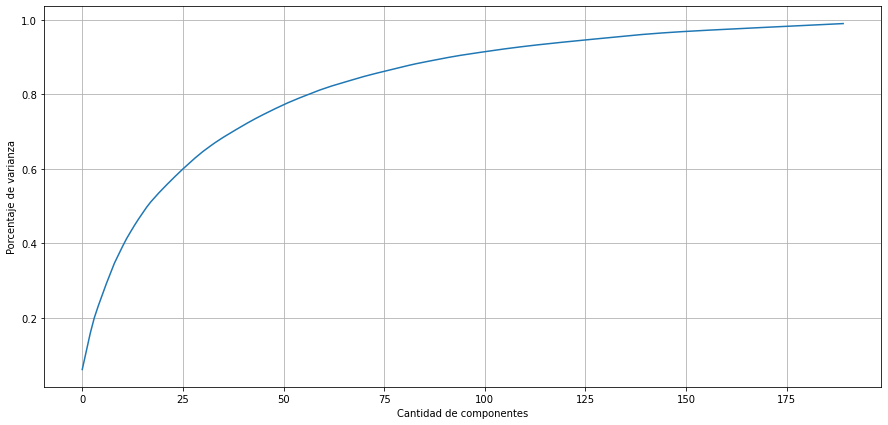

In [15]:
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(pca.n_components_), suma_acumulativa, '-')
plt.xlabel('Cantidad de componentes')
plt.ylabel('Porcentaje de varianza')
plt.show()

<div class="alert alert-info" role="alert">
    <center><h2>Datos para análisis.</h2></center>
</div>

In [16]:
X = pd.DataFrame(X_pca)
X.to_excel('X.xlsx')

In [17]:
y = pd.DataFrame(cupo)
y.to_excel('y.xlsx')

<a id='explo' class="btn btn-primary btn-lg btn-block active" role="button" aria-pressed="true" style="color:white">Exploración de Modelos</a>

<a class="list-group-item list-group-item-action active" id="Cls" data-toggle="list"  role="tab" aria-controls="home" style="background-color:green; color:white">Clasificación</a>

Inicialmente se busca respoder a la pregunta: Hacer el préstamo o no?
Se transformo la columna objetivo a binario categórico, donde 0 es equivalente a una empresa a la que no se le concedio el préstamo y 1, aquella a la que se le asignaron recursos.
Para explorar diferentes modelos, se uso el software libre Orange, para tener una idea aproximada de como se comportan diferentes modelos con la base de datos limpia.

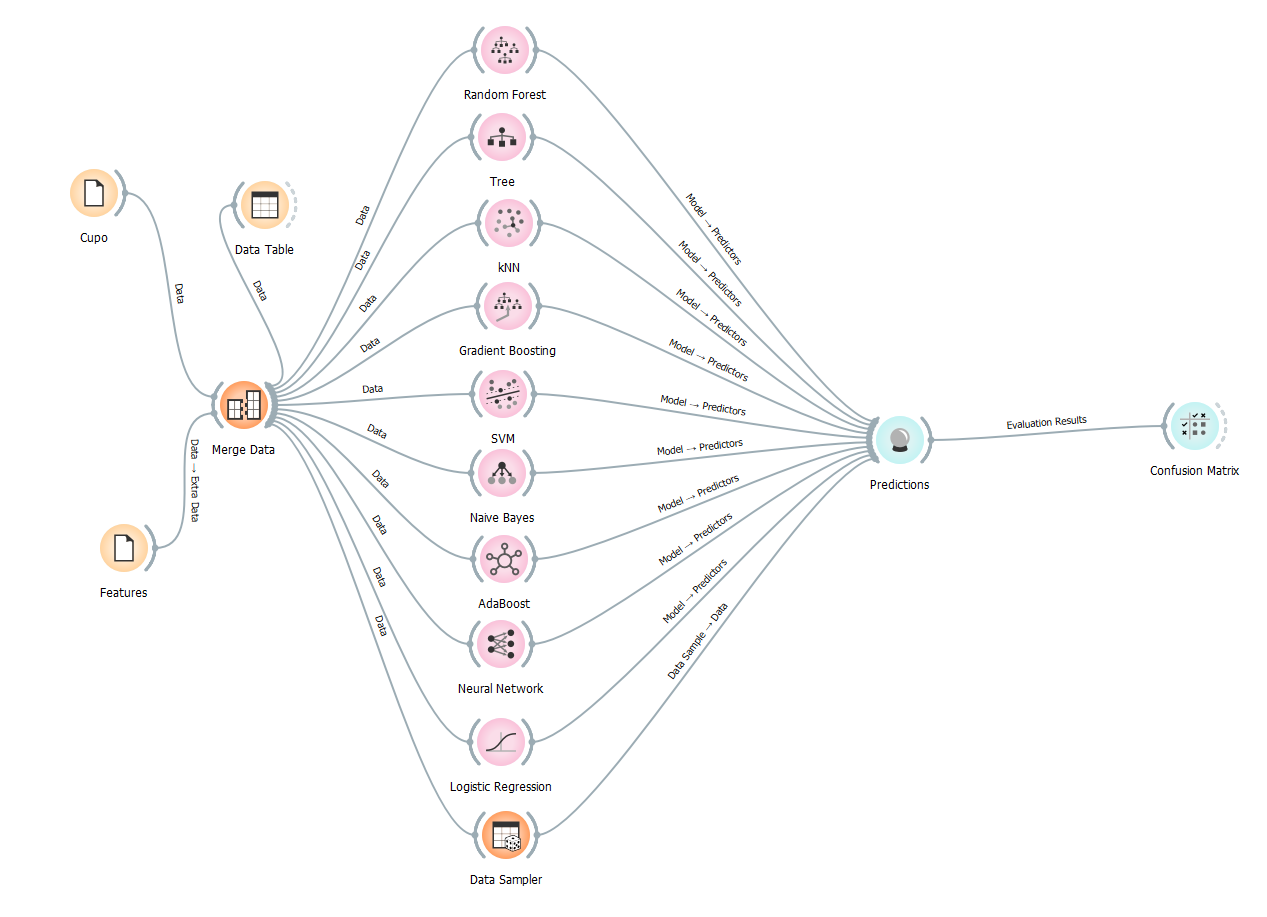

Se usaron los hiperparámetros que tiene por defecto el software, con lo cuál obtenemos los siguientes resultados:

| Model               | AUC    | CA     | F1     | Precision | Recall |
|---------------------|--------|--------|--------|-----------|--------|
| Random Forest       | 0,6365 | 0,6910 | 0,6700 |    0,6615 | 0,6910 |
| Gradient Boosting   | 0,6295 | 0,7031 | 0,6623 |    0,6588 | 0,7031 |
| Logistic Regression | 0,6168 | 0,6927 | 0,6444 |    0,6375 | 0,6927 |
| kNN                 | 0,6158 | 0,6962 | 0,6674 |    0,6597 | 0,6962 |
| Neural Network      | 0,6156 | 0,6597 | 0,6332 |    0,6199 | 0,6597 |
| Naive Bayes         | 0,5869 | 0,5781 | 0,5967 |    0,6352 | 0,5781 |
| AdaBoost            | 0,5659 | 0,6337 | 0,6388 |    0,6450 | 0,6337 |
| Tree                | 0,5493 | 0,6528 | 0,6521 |    0,6515 | 0,6528 |

En general los resultados son regulares, por lo cúal se hace necesario tunear Random Forest, que fue el modelo que mejores resultados parece obtener para ésta base de datos.

<a id='Tuneo' class="btn btn-primary btn-lg btn-block active" role="button" aria-pressed="true" style="color:white">Tuneo Modelo Clasificación</a>

<div class="alert alert-info" role="alert">
    <center><h2>Random Forest para Clasificación</h2></center>
</div>

In [18]:
y['cupo_calculado'] = y['cupo_calculado'].apply(lambda x: 1 if x != 0 else 0)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# X_train.shape
# X_test.shape

In [21]:
model = RandomForestClassifier(n_estimators=10, max_features='auto', random_state=42)

In [22]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [23]:
preds = model.predict(X_test)

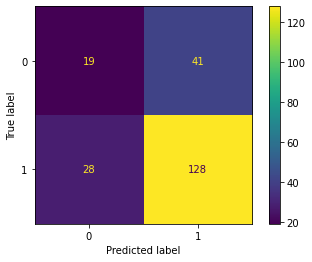

In [24]:
plot_confusion_matrix(model,X_test,y_test)
plt.show()

In [25]:
test_error = []

for n in range(1,40):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n,max_features='auto')
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))

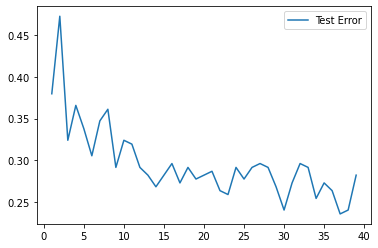

In [26]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()
plt.show()

In [27]:
n_estimators=[10, 15, 20, 25, 30, 35, 40]
bootstrap = [True,False]
oob_score = [True,False]
class_weight = ['balanced', None]

In [28]:
param_grid = {'n_estimators':n_estimators,
             'bootstrap':bootstrap,
             'class_weight': class_weight, 
             'oob_score':oob_score}

In [29]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [30]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'class_weight': ['balanced', None],
                         'n_estimators': [10, 15, 20, 25, 30, 35, 40],
                         'oob_score': [True, False]})

In [31]:
grid.best_params_

{'bootstrap': False,
 'class_weight': 'balanced',
 'n_estimators': 30,
 'oob_score': False}

In [32]:
predictions = grid.predict(X_test)

In [33]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.57      0.22      0.31        60
           1       0.76      0.94      0.84       156

    accuracy                           0.74       216
   macro avg       0.66      0.58      0.57       216
weighted avg       0.70      0.74      0.69       216



Se obtienen resultados ligeramente mejores a los obtenidos por Orange al balancear los pesos. Siendo un modelo aceptable. Pero que debe ser tomado como ayuda adicional y no enteramente como una herramienta de decisión.

<a id='Reg' class="btn btn-primary btn-lg btn-block active" role="button" aria-pressed="true" style="color:white">Análisis modelo Regresión</a>

<a class="list-group-item list-group-item-action active" id="Rs" data-toggle="list"  role="tab" aria-controls="home" style="background-color:green; color:white">Regresión</a>

La siguiente pregunta que podemos hacernos es: Cuanto prestar? Para ello, nuestra columna objetivo será tomada como el cupo asignado a cada cliente sin modificación alguna. Para ello, exploramos diferentes modelos de regresión en Orange, buscando tener una idea de que esperar de la base de datos obtenida de la limpieza.

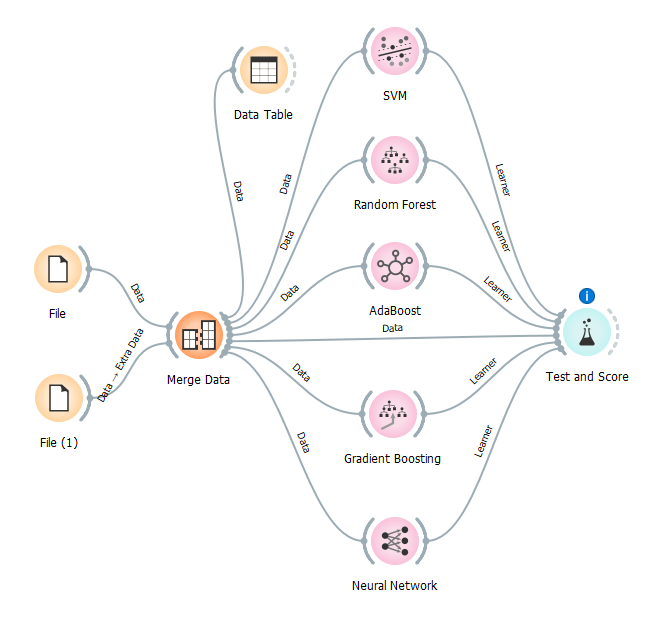

Se usaron los hiperparámetros que tiene por defecto el software, con lo cuál obtenemos los siguientes resultados:

|                   |          MSE          |       RMSE       |        MAE       |          R2         |
|:-----------------:|:---------------------:|:----------------:|:----------------:|:-------------------:|
| AdaBoost          | 6,15486295447457e+016 | 248089962,6      | 109516545,691667 | 0,277907999322721   |
| Random Forest     | 6,27601427902029e+016 | 250519745,310031 | 117311510,458333 | 0,263694457449734   |
| Gradient Boosting | 6,42303138336333e+016 | 253437001,705815 | 121313579,677564 | 0,246446327671041   |
| SVM               | 8,6135086768885e+016  | 293487796,626853 | 142431795,229018 | -0,0105417065092865 |
| Neural Network    | 1,04481059558217e+017 | 323235300,606566 | 138724638,974526 | -0,225777696226795  |

Lamentablemente los resultados no son adecuados en ningúna medida y estos modelos no deben ser usados. Por lo cual, veremos otras alternativas para dar solución a este problema.

<div class="alert alert-info" role="alert">
    <center><h2>Análisis Datos</h2></center>
</div>

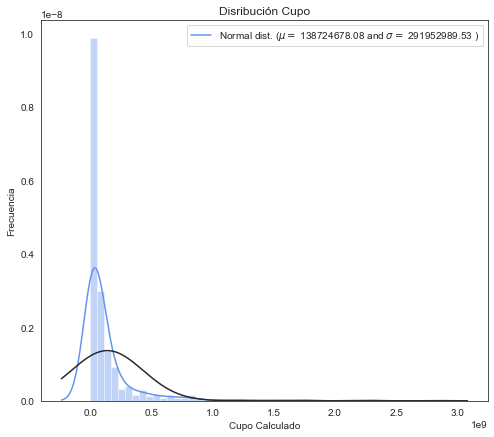

In [34]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(cupo_calculado['cupo_calculado'], fit=norm, color="cornflowerblue");

#Now plot the distribution
(mu, sigma) = norm.fit(cupo_calculado['cupo_calculado'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frecuencia")
ax.set(xlabel="Cupo Calculado")
ax.set(title="Disribución Cupo")

plt.show()

In [35]:
#skewness and kurtosis
print("Skewness: %f" % cupo_calculado['cupo_calculado'].skew())
print("Kurtosis: %f" % cupo_calculado['cupo_calculado'].kurt())

Skewness: 4.662255
Kurtosis: 27.614663


<div class="alert alert-danger" role="alert">
El cupo está sesgado a la derecha. Esto es un problema porque la mayoría de los modelos de ML no funcionan bien con datos que no se distribuyen normalmente. Podemos aplicar una transformación log(1+x) para corregir el sesgo.
</div>

In [36]:
cupo_calculado['cupo_calculado'] = np.log1p(cupo_calculado['cupo_calculado'])

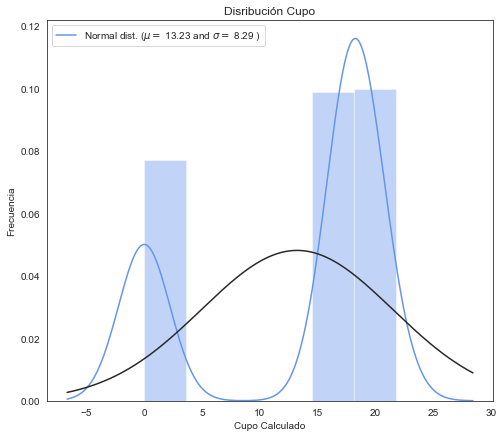

In [37]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(cupo_calculado['cupo_calculado'] , fit=norm, color="cornflowerblue");

#Now plot the distribution
(mu, sigma) = norm.fit(cupo_calculado['cupo_calculado'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frecuencia")
ax.set(xlabel="Cupo Calculado")
ax.set(title="Disribución Cupo")

plt.show()

<div class="alert alert-danger" role="alert">
Los modelos presentan muchos problemas debido a las empresas a las que no se les asignaron un cupo, por lo cual se descartan de la base de datos.
</div>

<div class="alert alert-info" role="alert">
    <center><h2>Normalización de los datos</h2></center>
</div>

In [39]:
y_cupo_reg = y_cupo.loc[~(df==0).all(axis=1)]
# y_cupo_reg = y_cupo.loc[~(df==0)]

In [40]:
y_cupo_reg['cupo_calculado'] = np.log1p(y_cupo_reg['cupo_calculado'])

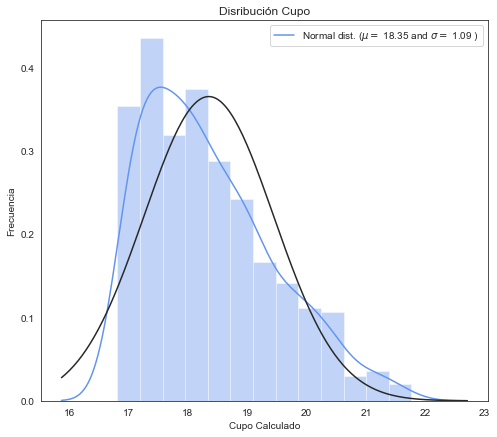

In [41]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(y_cupo_reg['cupo_calculado'] , fit=norm, color="cornflowerblue");

#Now plot the distribution
(mu, sigma) = norm.fit(y_cupo_reg['cupo_calculado'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frecuencia")
ax.set(xlabel="Cupo Calculado")
ax.set(title="Disribución Cupo")

plt.show()

In [42]:
# Operación aplicada
np.log1p(1200050)

13.99787461385513

In [43]:
# Operación reversa a ser usada posteriormente
np.expm1(13.99787461385513)

1200050.0000000005

<a id='modelReg' class="btn btn-primary btn-lg btn-block active" role="button" aria-pressed="true" style="color:white">Creación Modelos de Regresión</a>

<div class="alert alert-info" role="alert">
    <center><h2>Cross validation y RMSE</h2></center>
</div>

In [44]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

In [45]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X_pca_final, y_cupo_reg, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [46]:
xgboost = XGBRegressor()
gbr = GradientBoostingRegressor()  
rf = RandomForestRegressor()

In [47]:
stack_gen = StackingCVRegressor(regressors=(xgboost, gbr, rf),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

<div class="alert alert-info" role="alert">
    <center><h2>Scores Modelos</h2></center>
</div>

In [48]:
# X_Reg
# y_cupo
df_reg = pd.concat([X_Reg, y_cupo], axis=1)

In [49]:
df_reg2 = df_reg.loc[~(df_reg['cupo_calculado']==0)]
X_final = df_reg2.drop(['cupo_calculado'], axis=1)

In [50]:
scaled_X_final = scaler.fit_transform(X_final)
X_pca_final = pca.fit_transform(scaled_X_final)

In [51]:
X_pca_final.shape

(519, 145)

In [52]:
scores = {}

score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['xgb'] = (score.mean(), score.std())

xgboost: 0.8000 (0.1072)


In [53]:
score = cv_rmse(rf)
print("rf: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['rf'] = (score.mean(), score.std())

rf: 0.7147 (0.0970)


In [54]:
score = cv_rmse(gbr)
print("gbr: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['gbr'] = (score.mean(), score.std())

gbr: 0.7389 (0.1051)


<div class="alert alert-info" role="alert">
    <center><h2>Fitting Modelos</h2></center>
</div>

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_final, y_cupo_reg, test_size=0.3, random_state=42)

In [56]:
print('stack_gen')
# stack_gen_model = stack_gen.fit(np.array(X), np.array(y))
stack_gen_model = stack_gen.fit(X_train, y_train)

stack_gen


In [57]:
print('xgboost')
xgb_model_full_data = xgboost.fit(X_train, y_train)

xgboost


In [58]:
print('RandomForest')
rf_model_full_data = rf.fit(X_train, y_train)

RandomForest


In [59]:
print('GradientBoosting')
gbr_model_full_data = gbr.fit(X_train, y_train)

GradientBoosting


In [60]:
def blended_predictions(X):
    return (((0.25 * gbr_model_full_data.predict(X)) + \
            (0.25 * xgb_model_full_data.predict(X)) + \
            (0.25 * rf_model_full_data.predict(X)) + \
            (0.25 * stack_gen_model.predict(np.array(X)))))

In [61]:
blended_score = rmsle(y_test, blended_predictions(X_test))
scores['blended'] = (blended_score, 0)
print('RMSE score on train data:')
print(blended_score)

RMSE score on train data:
0.7665517424186165


<a id='pred' class="btn btn-primary btn-lg btn-block active" role="button" aria-pressed="true" style="color:white">Predicciones</a>

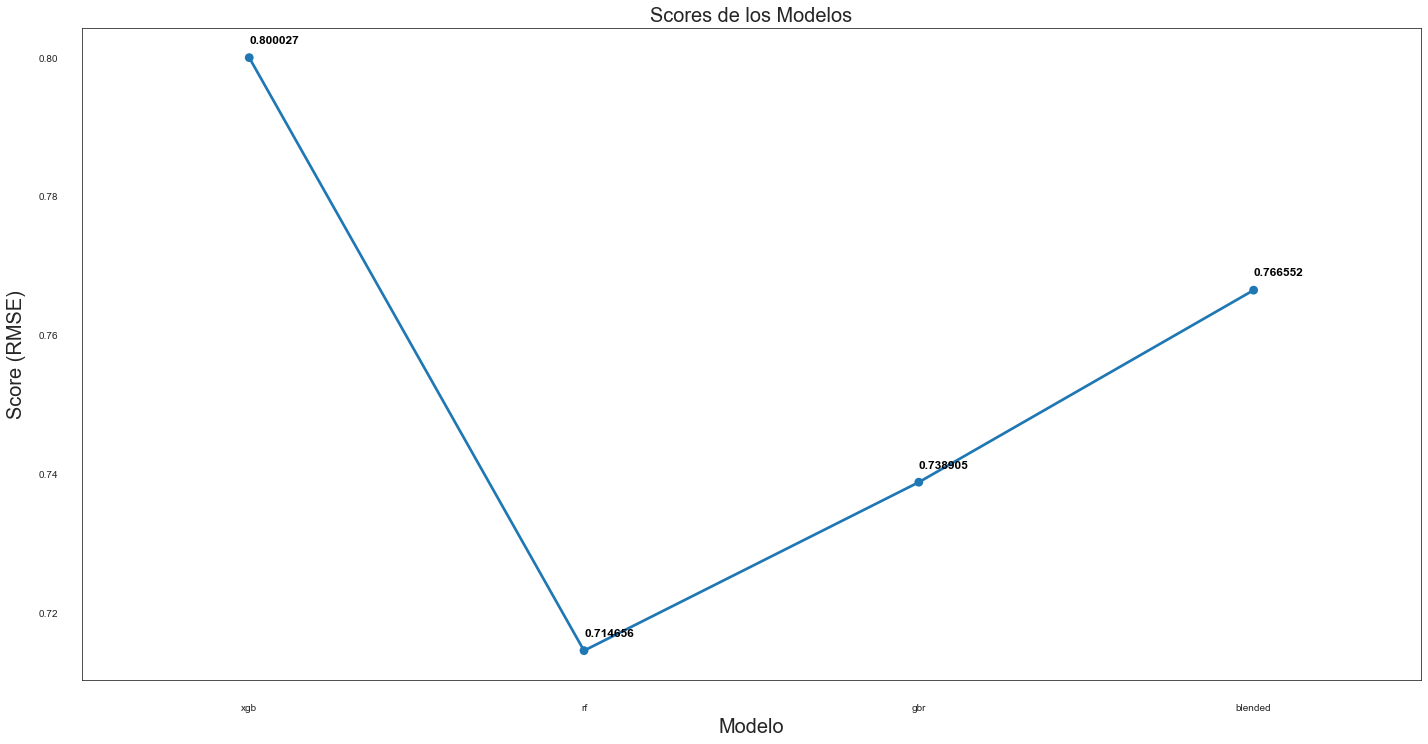

In [62]:
sns.set_style("white")
fig = plt.figure(figsize=(24, 12))

ax = sns.pointplot(x=list(scores.keys()), y=[score for score, _ in scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE)', size=20, labelpad=12.5)
plt.xlabel('Modelo', size=20, labelpad=5)
plt.tick_params(axis='x', size=20)
plt.tick_params(axis='y', size=20)

plt.title('Scores de los Modelos', size=20)

plt.show()

In [63]:
predicciones = np.floor(np.expm1(rf.predict(X_test)))

In [64]:
test = np.floor(np.expm1(y_test))

<div class="alert alert-info" role="alert">
    <center><h2>RMSE Final</h2></center>
</div>

In [65]:
np.sqrt(mean_squared_error(test, predicciones))

238408947.90766248

Lamentablemente el modelo de regresión reporta un error bastante alto, con lo cuál no se sugiere usarlo de modo predictivo.

<hr class="my-4">

In [66]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")